In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(666)
x = np.random.normal(0, 1, size=(200, 2))
y = np.array(x[:, 0] ** 2 + x[:, 1] ** 2 < 1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1

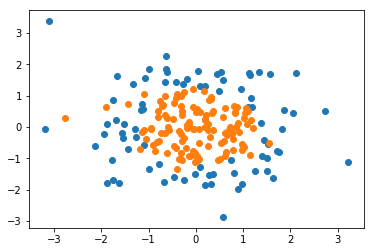

In [8]:
plt.scatter(x[y == 0, 0], x[y == 0, 1])
plt.scatter(x[y == 1, 0], x[y == 1, 1])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

H:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
log_reg.score(x_train, y_train)

0.5666666666666667

In [15]:
log_reg.score(x_test, y_test)

0.72

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])

In [27]:
poly_log_reg = PolynomialLogisticRegression(degree=2, C=0.1, penalty='l1')
poly_log_reg.fit(x_train, y_train)

H:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [28]:
poly_log_reg.score(x_test, y_test)

0.88

In [29]:
from sklearn import datasets

In [36]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [38]:
log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
log_reg.score(x_test, y_test)

1.0

In [41]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(x_train, y_train)
ovr.score(x_test, y_test)

0.9736842105263158

In [42]:
ovr = OneVsOneClassifier(log_reg)
ovr.fit(x_train, y_train)
ovr.score(x_test, y_test)

1.0